<a href="https://colab.research.google.com/github/FaithOsamaye/Chinese-Car-Price/blob/main/CarPrice_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving car.jpg to car.jpg


**Problem Statement**

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

**Business Goal**

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


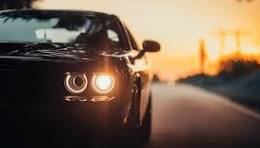

In [ ]:
Image('car.jpg',width=1000)

In [ ]:
#importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('CarPrice_Assignment.csv')

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
#duplicates
df.duplicated().sum()

0

**1. How many cars are present in our data set distinguished by their fuel type and enginelocation?**

Text(0.5, 1.0, 'Fuel Type vs Engine Location')

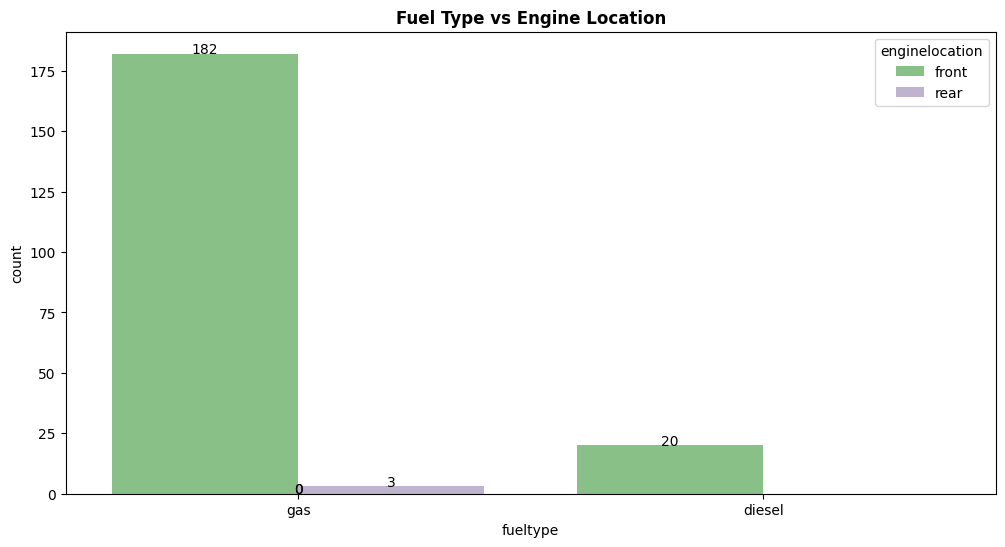

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='fueltype', hue='enginelocation',data=df,palette='Accent')
for p in ax.patches:
  height =p.get_height()
  ax.text(p.get_x()+ p.get_width()/2., height+0.05,f'{int(height)}', ha='center')
plt.title('Fuel Type vs Engine Location', weight='bold')

**2. Based off the car body, how is the door number like?**

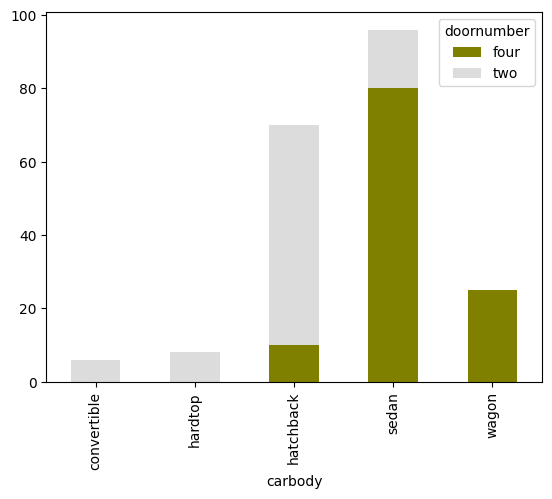

In [ ]:
gp = df.groupby(['carbody','doornumber']).size().unstack()
col = ['olive','gainsboro']
gp.plot(kind='bar', stacked=True,color=col)
plt.show()

**3. What cars have the highest horse power?**

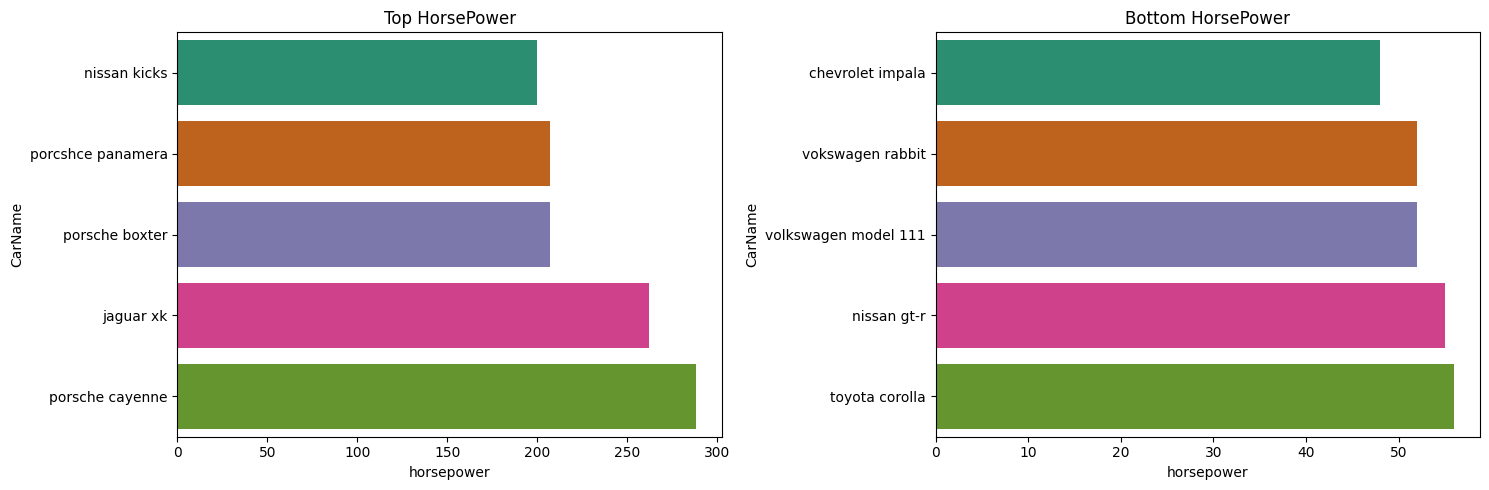

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
horse_max = df.groupby('CarName')['horsepower'].max().nlargest(n=5).reset_index()
horse_max = horse_max.sort_values(by='horsepower', ascending=True)
sns.barplot(y='CarName', x='horsepower',data=horse_max,ax=axes[0],hue='CarName',palette='Dark2')
axes[0].set_title('Top HorsePower')
horse_min = df.groupby('CarName')['horsepower'].min().nsmallest(n=5).reset_index()
horse_min = horse_min.sort_values(by='horsepower', ascending=True)
sns.barplot(y='CarName', x='horsepower',data=horse_min,ax=axes[1], hue='CarName',palette='Dark2')
axes[1].set_title('Bottom HorsePower')

plt.tight_layout()

In [ ]:
df.head(1)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


**4. The cheapest and most expensive cars?**

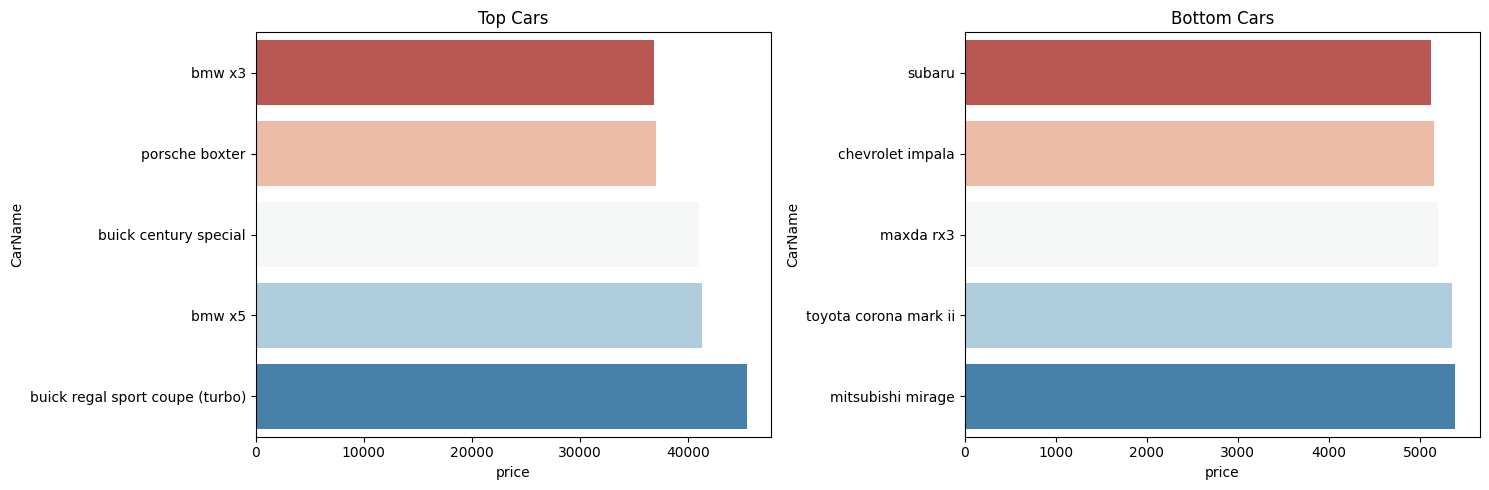

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,5))
car_max = df.groupby('CarName')['price'].max().nlargest(n=5).reset_index()
car_max = car_max.sort_values('price', ascending=True)
ax1 = sns.barplot(y='CarName', x='price',data=car_max,ax=axes[0],hue='CarName',palette='RdBu')
axes[0].set_title('Top Cars')

car_min = df.groupby('CarName')['price'].min().nsmallest(n=5).reset_index()
car_min = car_min.sort_values('price', ascending=True)
sns.barplot(y='CarName', x='price',data=car_min,ax=axes[1], hue='CarName',palette='RdBu')
axes[1].set_title('Bottom Cars')


plt.tight_layout()

# **Machine Learning**

In [ ]:
df_copied = df.drop(['CarName','car_ID','fuelsystem'], axis=1)

In [ ]:
df_copied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [ ]:
#encoding
fuel = pd.get_dummies(df_copied['fueltype'], drop_first=True).astype('float')
asp = pd.get_dummies(df_copied['aspiration'], drop_first=True).astype('float')
door = pd.get_dummies(df_copied['doornumber'], drop_first=True).astype('float')
car = pd.get_dummies(df_copied['carbody'], drop_first=True).astype('float')
drive = pd.get_dummies(df_copied['drivewheel'], drop_first=True).astype('float')
engine = pd.get_dummies(df_copied['enginelocation'], drop_first=True).astype('float')
engine_typ = pd.get_dummies(df_copied['enginetype'], drop_first=True).astype('float')
cylin = pd.get_dummies(df_copied['cylindernumber'], drop_first=True).astype('float')

In [ ]:
df_copied = pd.concat([df_copied,fuel,asp,door,car,drive,engine,engine_typ,cylin], axis=1)

In [ ]:
df_copied = df_copied.drop(['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber'], axis=1)

In [ ]:
df_copied.head(1)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#scale the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score,mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X=df_copied.drop('price', axis=1)
y=df_copied['price']

In [ ]:
ms = MinMaxScaler().fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = lr.predict(X_test)

In [ ]:
linr2 = r2_score(pred,y_test)
linmae = mean_absolute_error(pred,y_test)

pd.DataFrame(data={"Model": 'Linear Regression',"MAE": linmae,"R2": linr2},index=[0])

,Model,MAE,R2
0,Linear Regression,1829.95886,0.930432


In [ ]:
ylist = y_test.to_list()

In [ ]:
print('top 5 predicted X_test is : ', pred[:5])

print('top 5 predicted X_test is : ', ylist[:5])

top 5 predicted X_test is :  [13380.79418468  8866.82860802  5783.40970266 21134.71668642
 36372.87177519]
top 5 predicted X_test is :  [10945.0, 9298.0, 6377.0, 15998.0, 35056.0]


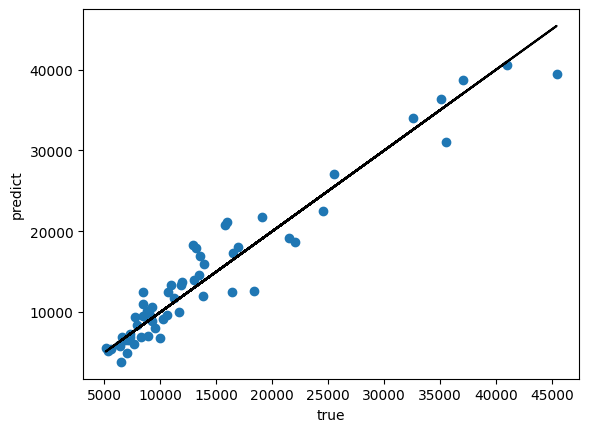

In [ ]:
#Plot
plt.scatter(x=y_test, y=pred)
plt.xlabel('true')
plt.ylabel('predict')

plt.plot(y_test, y_test, color = 'black')

**2. Ridge**

In [ ]:
ridg = Ridge(alpha=1.0)

ridg.fit(X_train,y_train)

Ridge()

In [ ]:
ridg_pred = ridg.predict(X_test)

In [ ]:
ridgr2 = r2_score(ridg_pred,y_test)
ridgmae = mean_absolute_error(ridg_pred,y_test)

pd.DataFrame(data={"Model": 'Ridge Regression',"MAE": ridgmae,"R2": ridgr2},index=[0])

,Model,MAE,R2
0,Ridge Regression,2089.221192,0.859528


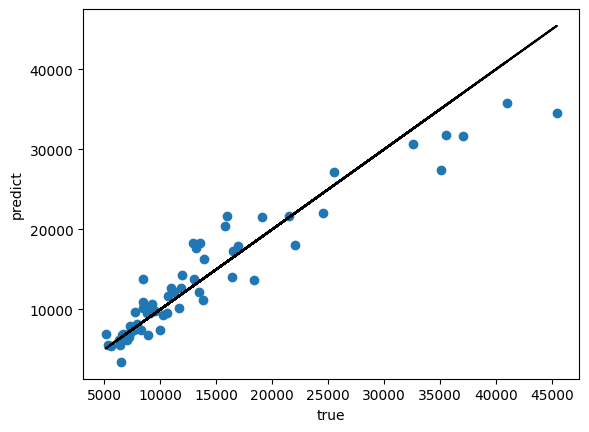

In [ ]:
#Plot
#Plot
plt.scatter(x=y_test, y=ridg_pred)
plt.xlabel('true')
plt.ylabel('predict')

plt.plot(y_test, y_test, color = 'black')

**3. Lasso**

In [ ]:
las_model = Lasso(alpha=50,max_iter=100,tol=0.1)

las_model.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
las_pred = las_model.predict(X_test)

In [ ]:
lasr2 = r2_score(las_pred,y_test)
lasmae = mean_absolute_error(las_pred,y_test)

pd.DataFrame(data={"Model": 'Lasso Regression',"MAE": lasmae,"R2": lasr2},index=[0])

,Model,MAE,R2
0,Lasso Regression,2584.387358,0.750021


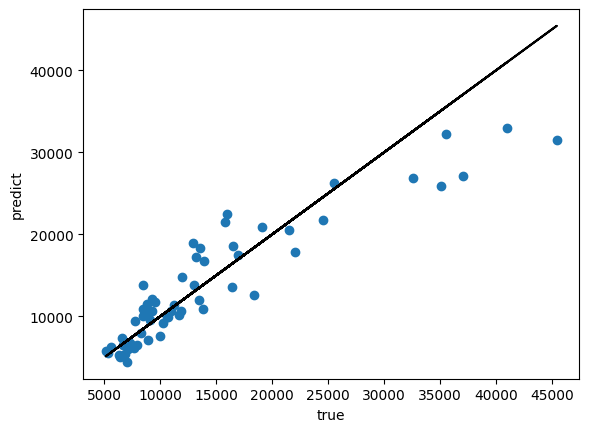

In [ ]:
#Plot
plt.scatter(x=y_test, y=las_pred)
plt.xlabel('true')
plt.ylabel('predict')

plt.plot(y_test, y_test, color = 'black')